In [ ]:
import pandas as pd
import numpy as np

def normalize_feature(df):
    return df.apply(lambda column:(column-column.mean())/column.std())

df = normalize_feature(pd.read_csv('data.csv',names=['square','bedrooms','price']))

ones = pd.DataFrame({'ones':np.ones(len(df))}) #ones是n行1列的数据框，表示x0恒威1
df = pd.concat([ones,df],axis=1) #根据列合并数据
df.head()

# 数据处理：获取X和y

In [ ]:
X_data = np.array(df[df.columns[0:3]])
y_data = np.array(df[df.columns[-1]]).reshape(len(df),1)

print(X_data.shape,type(X_data))
print(y_data.shape,type(y_data))

# 创建线性回归模型（数据流图）

In [ ]:
import tensorflow as tf

alpha = 0.01 # 学习率alpha
epoch = 500 # 训练全量数据集的轮数

with tf.name_scope('input'):
    # 输入X，形状（47，3）
    X = tf.placeholder(tf.float32,X_data.shape,name='x')
    # 输出y，形状（47，1）
    y = tf.placeholder(tf.float32,y_data.shape,name = 'y')
    
with tf.name_scope('hypotheis'):
    # 权重变量w，形状（3，1）
    W = tf.get_variable("weights",(X_data.shape[1],1),initializer=tf.constant_initializer())
    # 假设函数h(x) = w0*x0 + w1*x1 + w2*x2 ,其中x0恒为1
    # 推理值 y_pred 形状（47，1）
    y_pred = tf.matmul(X,W)

with tf.name_scope('loss'):
    # 损失函数采用最小二乘法，y_pred-y是形如[47，1]的向量。
    # tf.matmul(a,b,transpose_a=True)表示∶矩阵a的转置乘矩阵b，即[1,47] X[47,1]
    # 损失函数操作loss
    loss_op = 1/(2*len(X_data))*tf.matmul((y_pred-y),(y_pred-y),transpose_a=True)

with tf.name_scope('train'):
    # 随机梯度下降优化器opt
    opt = tf.train.GradientDescentOptimizer(learning_rate = alpha)
    # 单论训练操作 train_op
    train_op = opt.minimize(loss_op)

# 创建会话（运行环境）

In [ ]:
with tf.Session() as sess:
    #初始化全局变量
    sess.run(tf.global_variables_initializer())
    
    # 创建FileWriter实例
    writer = tf.summary.FileWriter("./summary/linear-regression-1",sess.graph)
    # 开始训练模型
    # 因为训练集较小，所以每轮都使用全局数据训练
    for e in range(1,epoch+1):
        sess.run(train_op,feed_dict={X:X_data,y:y_data})
        if e % 10 ==0:
            loss,w = sess.run([loss_op,W],feed_dict={X:X_data,y:y_data})
            log_str = "Epoch %d \t Loss = %.4g \t Model:y = %.4gx1 + % .4gx2 +%.4g"
            print(log_str % (e,loss,w[1],w[2],w[0]))
writer.close()

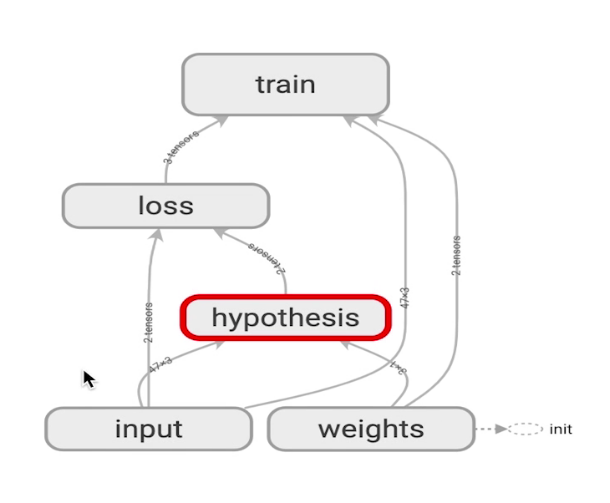